In [2]:
!pip install scipy
!pip install seaborn

import pandas as pd
!pip install matplotlib==3.8.1
import matplotlib.pyplot as plt

import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
paleta_de_colores = ["#fbf8cc","#fde4cf","#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5","#98f5e1","#b9fbc0"]

# 1. Análisis de facturación - Mejorado con pandas y pyplot

### Importación de datos



In [ ]:
def importacion_de_datos(n):
    '''Importa los datos de un archivo CSV y los devuelve como un DataFrame de pandas.
    Args:
        n (int): cantidad de archivos a importar desde la carpeta "base_de_datos". Deben tener su nombre en el formato "Tienda1.csv", "Tienda2.csv", ..., "Tiendan.csv".    
    Returns:
        pd.DataFrame: DataFrame con los datos importados, agregando una columa "Tiendas" con el valor "Tiendan" para su identificación.
    '''
    # Crear un DataFrame vacío para almacenar los datos de todas las tiendas    
    df = pd.DataFrame([])

    # Iterar sobre el rango de tiendas desde 1 hasta n
    for i in range(1,n+1):

        # Leer el archivo CSV de la tienda i
        df_t = pd.read_csv(f"base_de_datos/tienda_{str(i)}.csv")
        # Insertar una columna 'Tienda' al inicio del DataFrame con el nombre de la tienda
        df_t.insert(0, 'Tienda', f'Tienda{str(i)}')
        # Concatenar el DataFrame de la tienda actual al DataFrame general
        df = pd.concat([df, df_t])
    
    
    # Exportar el DataFrame a un archivo CSV
    df.to_csv('base_de_datos/tiendas.csv', index=False, encoding='utf-8-sig')

    # Devolver el DataFrame con los datos de todas las tiendas
    return df.reset_index(drop=True)
    
    


In [5]:
df_tiendas = importacion_de_datos(4)
df_tiendas.sample(5)

,Tienda,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
6327,Tienda3,Bicicleta,Deportes y diversión,615000.0,33000.0,20/09/2022,Rafael Acosta,Bogotá,5,Nequi,1,4.60971,-74.08175
8789,Tienda4,Impresora,Electrónicos,270400.0,14800.0,10/05/2020,Izabela de León,Bogotá,5,Tarjeta de crédito,4,4.60971,-74.08175
971,Tienda1,Impresora,Electrónicos,246000.0,13500.0,27/01/2020,Camila Rivera,Cali,4,Tarjeta de crédito,2,3.43722,-76.52250
1552,Tienda1,Dinosaurio Rex,Juguetes,15900.0,1200.0,12/07/2020,Beatriz Morales,Bogotá,4,Tarjeta de crédito,2,4.60971,-74.08175
3022,Tienda2,Lavadora de ropa,Electrodomésticos,1372600.0,76400.0,24/12/2021,Blanca Ramirez,Bogotá,4,Nequi,1,4.60971,-74.08175


In [6]:
def ingresos_por_tienda(df):
    '''Calcula los ingresos totales por tienda, devuelve un DataFrame con los resultados y genera un gráfico de barras horizontales para visualización.

    Args:
        df (pd.DataFrame): DataFrame con los datos de ventas de las tiendas.
    Outputs:
        Gráfico de barras horizontales que muestra los ingresos totales por tienda.     
    Returns:
        pd.DataFrame: DataFrame con las tiendas y sus ingresos totales.
    '''
    # Verificar si el DataFrame está vacío
    if df.empty:
        # Si el DataFrame está vacío, retornar un DataFrame vacío con las columnas esperadas
        print("El DataFrame está vacío.")
        return pd.DataFrame(columns=['Tienda', 'Ingresos Totales'])
    
    # Verificar si las columnas necesarias existen en el DataFrame
    if 'Tienda' not in df.columns or 'Precio' not in df.columns:
        # Si las columnas no existen, retornar un DataFrame vacío con las columnas esperadas
        print("El DataFrame no contiene las columnas necesarias.")
        return pd.DataFrame(columns=['Tienda', 'Ingresos Totales'])

    # Creando df_ingresos para almacenar los ingresos totales por tienda

    # Agrupar por tienda y sumar los ingresos
    df_ingresos = df.groupby('Tienda')['Precio'].sum().reset_index()
    # Renombrar la columna de ingresos
    df_ingresos.rename(columns={'Precio': 'Ingresos Totales'}, inplace=True)
    # Ordenar el DataFrame por ingresos totales de forma descendente
    df_ingresos.sort_values(by='Ingresos Totales', ascending=False, inplace=True)
    # Convertir la columna 'Ingresos Totales' a tipo entero
    df_ingresos['Ingresos Totales'] = df_ingresos['Ingresos Totales'].astype(int)

    # Crear el gráfico de barras horizontal
    bars = df_ingresos.plot.barh(x='Tienda', y='Ingresos Totales', color=paleta_de_colores, figsize=(8, 4))
    # Añadir etiquetas a las barras
    bars.bar_label(bars.containers[0], padding=-100)
    # Configurar etiquetas y título del gráfico
    plt.xlabel('Ingresos Totales')
    plt.ylabel('Tienda')
    plt.title('Gráfico de ingresos totales por tienda')
    # Ocultar la leyenda
    bars.legend().set_visible(False)
    # Mostrar el gráfico
    plt.show()  

    # Exportar el DataFrame a un archivo CSV
    df_ingresos.to_csv('base_de_datos/ingresos_por_tienda.csv', index=False, encoding='utf-8-sig')
    
    # Devolver el DataFrame con los ingresos totales por tienda
    return df_ingresos

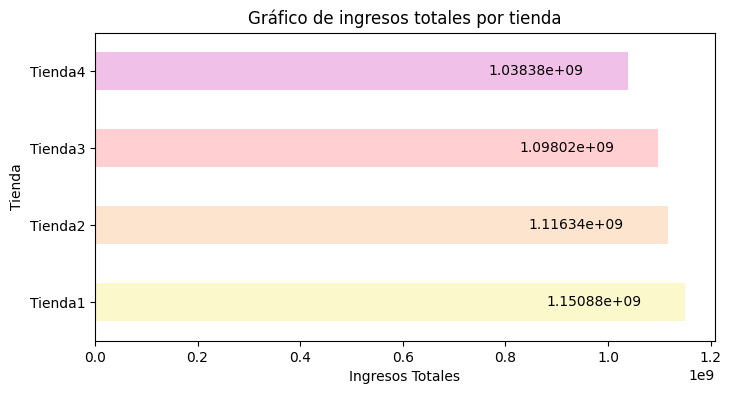

,Tienda,Ingresos Totales
0,Tienda1,1150880400
1,Tienda2,1116343500
2,Tienda3,1098019600
3,Tienda4,1038375700


In [7]:
ingresos_por_tienda(df_tiendas)

# 2. Ventas por categoría - Versión mejorada

En este paso calcularemos la cantidad de productos vendidos por categoría en cada tienda. 
La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [8]:
# Creando un dataframe con las ventas por categoría de producto por tienda
def ventas_por_categoria(df):
    '''Calcula las ventas totales por categoría de producto y tienda, devuelve un DataFrame con los resultados, genera un gráfico de barras horizontales para visualización y exporta un csv con los datos.

    Args:
        df (pd.DataFrame): DataFrame con los datos de ventas de las tiendas.
    Outputs:
        Gráfico de barras horizontales que muestra las ventas totales por categoría de producto y tienda.     
    Returns:
        pd.DataFrame: DataFrame con las categorías de productos y sus ventas totales por tienda.
    '''
    # Verificar si el DataFrame está vacío
    if df.empty:
        # Si el DataFrame está vacío, retornar un DataFrame vacío con las columnas esperadas
        print("El DataFrame está vacío.")
        return pd.DataFrame(columns=['Tienda', 'Categoría del Producto', 'Ingresos T'])
    
    # Verificar si las columnas necesarias existen en el DataFrame
    if 'Tienda' not in df.columns or 'Categoría del Producto' not in df.columns or 'Precio' not in df.columns:
        # Si las columnas no existen, retornar un DataFrame vacío con las columnas esperadas
        print("El DataFrame no contiene las columnas necesarias.")
        return pd.DataFrame(columns=['Tienda', 'Categoría del Producto', 'Ingresos T'])

    # Agrupar por tienda y categoría de producto, sumando los ingresos por categoría
    df_ventas = df.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()
    # Renombrar la columna de Precio a 'Ingresos T'
    df_ventas.rename(columns={'Precio': 'Ingresos T'}, inplace=True)
    # Convertir la columna 'Ingresos T' a tipo entero
    df_ventas['Ingresos T'] = df_ventas['Ingresos T'].astype(int)

    # Agregar una columna 'Cantidad de ventas' que cuenta el número de productos vendidos por tienda y categoría
    df_ventas['Cantidad de ventas'] = df.groupby(['Tienda', 'Categoría del Producto'])['Precio'].count().values

    # Crear un gráfico stacked de barras verticales

    # Pivot para stacked bar
    # Pivotar el DataFrame para obtener los ingresos por categoría y tienda
    pivot = df_ventas.pivot(index='Tienda', columns='Categoría del Producto', values='Ingresos T')
    # Pivotar el DataFrame para obtener las ventas por categoría y tienda
    ventas_pivot = df_ventas.pivot(index='Tienda', columns='Categoría del Producto', values='Cantidad de ventas')

    # Crear el gráfico de barras apiladas
    # Crear una figura y un eje para el gráfico
    fig, ax = plt.subplots(figsize=(12, 8))

    # Crear una lista para almacenar la altura de las barras apiladas 
    bottom = np.zeros(len(pivot))

    for i, categoria in enumerate(pivot.columns):
        # Obtener los ingresos y las ventas para la categoría actual
        # y rellenar los valores NaN con 0
        ingresos = pivot[categoria].fillna(0) 
        ventas = ventas_pivot[categoria].fillna(0)
        
        # Crear las barras apiladas
        bars = ax.bar(pivot.index, ingresos, bottom=bottom, color=paleta_de_colores[i % len(paleta_de_colores)], label=categoria)
        
        # Etiquetas con cantidad de ventas
        ax.bar_label(bars, labels=[f'{int(v)}' for v in ventas], label_type='center', fontsize=8)
        
        # Actualizar la altura de las barras apiladas
        bottom += ingresos

    ax.set_ylabel('Ingresos T')
    ax.set_xlabel('Tienda')
    ax.set_title('Ingresos por Categoría y Tienda (Stacked)')
    ax.legend(title='Categoría', bbox_to_anchor=(0.5, -.1), ncol=3, loc='upper center')
    plt.tight_layout()
    plt.show()

    # Exportar el DataFrame a un archivo CSV
    df_ventas.to_csv('base_de_datos/ventas_por_categoria.csv', index=False)

    # Devolver el DataFrame con las ventas totales por categoría de producto y tienda
    return df_ventas

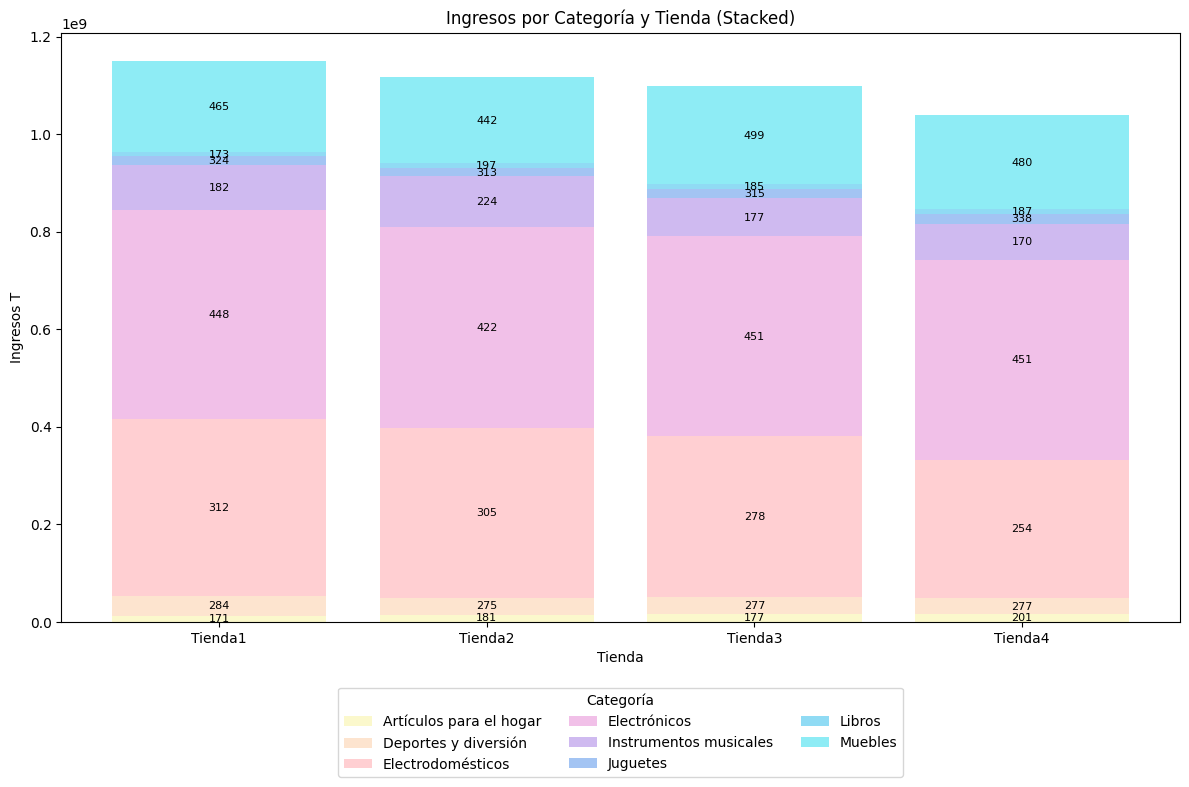

In [ ]:
df = ventas_por_categoria(df_tiendas)

# 3. Calificación promedio de la tienda - Mejorado

En este paso, calculamos las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [10]:
df_tiendas.head()

,Tienda,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Tienda1,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Tienda1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Tienda1,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Tienda1,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Tienda1,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [11]:
def calificacion_promedio(tiendas):
    '''Calcula la calificación promedio por tienda y genera un gráfico de violín para visualización.

    Args:
        tiendas (pd.DataFrame): DataFrame con los datos de calificaciones de las tiendas.
    Outputs:
        Gráfico de violín que muestra la distribución de calificaciones por tienda.     
    Returns:
        pd.DataFrame: DataFrame con las tiendas y sus calificaciones promedio.
    '''
    # Verificar si el DataFrame está vacío
    if tiendas.empty:
        print("El DataFrame está vacío.")
        return pd.DataFrame(columns=['Tienda', 'Calificación'])
    # Verificar si las columnas necesarias existen en el DataFrame
    if 'Tienda' not in tiendas.columns or 'Calificación' not in tiendas.columns:
        print("El DataFrame no contiene las columnas necesarias.")
        return pd.DataFrame(columns=['Tienda', 'Calificación'])

    # Agrupar por tienda y calificación, y contar la cantidad de ocurrencias
    df_calificaciones = tiendas.groupby(['Tienda', 'Calificación']).size().unstack()#.fillna(0)
    # Agregar una columna de promedio por tienda
    df_calificaciones['Promedio']= tiendas.groupby('Tienda')['Calificación'].mean().round(2)

    # Crear el gráfico lineal comparativo
    plt.figure(figsize=(8, 4))

    # Graficar cada calificación como una línea
    for calificacion in df_calificaciones.columns:
        # Graficar la calificación si no es 'Promedio'
        if calificacion != 'Promedio':
                # Graficar la calificación
                plt.plot(df_calificaciones.index, 
                df_calificaciones[calificacion], 
                marker='o', label=f'Calificación {calificacion}')

    # Configurar el gráfico
    plt.title('Cantidad de Calificaciones por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Cantidad de Calificaciones')
    plt.legend(title='Calificación', loc='upper right' )
    plt.grid(True)
    plt.tight_layout()

    plt.show()

    # Exportar el DataFrame a un archivo CSV
    df_calificaciones.columns.name = None  # Para quitar "Calificación"
    df_calificacion = df_calificaciones.reset_index()
    
    df_calificacion.to_csv('base_de_datos/calificacion_por_tienda.csv', index=False, encoding='utf-8-sig')

    return df_calificaciones

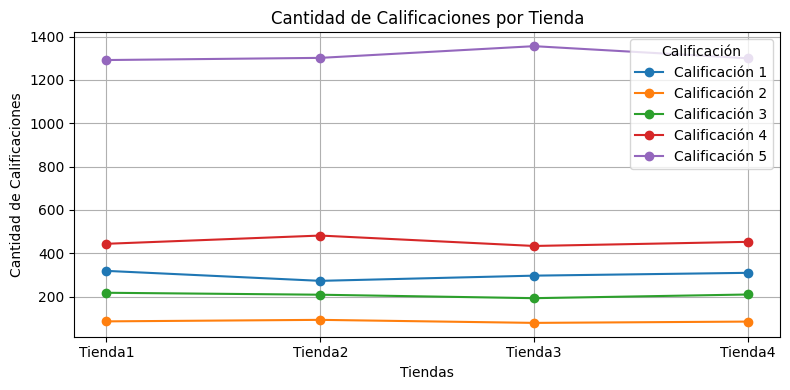

,1,2,3,4,5,Promedio
Tienda,,,,,,
Tienda1,319,86,218,444,1292,3.98
Tienda2,273,93,209,482,1302,4.04
Tienda3,297,79,193,434,1356,4.05
Tienda4,310,85,210,453,1300,4.00


In [12]:
calificacion_promedio(df_tiendas)

# 4. Productos más y menos vendidos - Mejorado

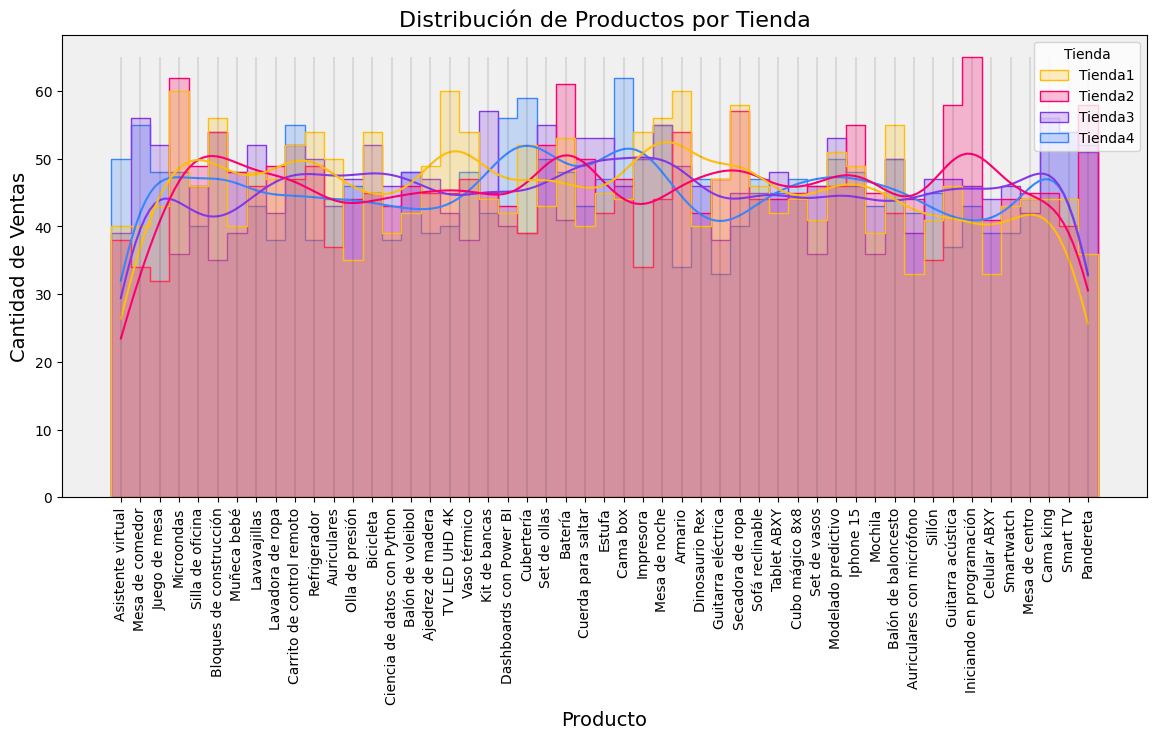

In [13]:
# NO UTILIZADO

# Gráfico general de la distribución de productos por tienda
# Directamente con df_tiendas

# Definir el tamaño del gráfico
plt.figure(figsize=(14, 6));
# Crear el histograma
ax = sns.histplot(df_tiendas, x="Producto", hue="Tienda", element="step", kde=True, kde_kws={'bw_adjust': 0.5}, palette=['#ffbe0b', "#ff006e", '#8338ec', '#3a86ff']);
# Configurar el título y las etiquetas
ax.set_title('Distribución de Productos por Tienda', fontsize=16);
# Configurar las etiquetas de los ejes
ax.set_xlabel('Producto', fontsize=14);
ax.set_ylabel('Cantidad de Ventas', fontsize=14);
# Configurar el fondo del gráfico
ax.set_facecolor('#f0f0f0');
# Configurar las líneas verticales en el gráfico
# Añadir líneas verticales en el eje x
ax.vlines(x = [i for i in range(51)], # Line on x = [-2, 0, 2]
          ymin = 0, # Starting point for all lines
          ymax = 65,
          colors = ["#01010118" for i in range(51)]) # End point for each line
# Configurar las etiquetas del eje x
plt.xticks(rotation=90, fontsize=10);



## Ver los 4 productos más vendidos por tienda

In [14]:
df_tiendas.head(3)

,Tienda,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Tienda1,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Tienda1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Tienda1,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


In [15]:
# Agrupando por tienda y producto, contando la cantidad de productos vendidos y eliminando el índice original
df_productos_t_cant = df_tiendas.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad').reset_index(drop=True)

# Ordenando el DataFrame por tienda y cantidad de productos vendidos, eliminando el índice original
df_productos_t_cant =df_productos_t_cant.sort_values(by=['Tienda', 'Cantidad'], ascending=[True, False]).reset_index(drop=True)
df_productos_t_cant

,Tienda,Producto,Cantidad
0,Tienda1,Armario,60
1,Tienda1,Microondas,60
2,Tienda1,TV LED UHD 4K,60
3,Tienda1,Secadora de ropa,58
4,Tienda1,Bloques de construcción,56
...,...,...,...
199,Tienda4,Lavadora de ropa,38
200,Tienda4,Refrigerador,38
201,Tienda4,Guitarra acústica,37
202,Tienda4,Armario,34


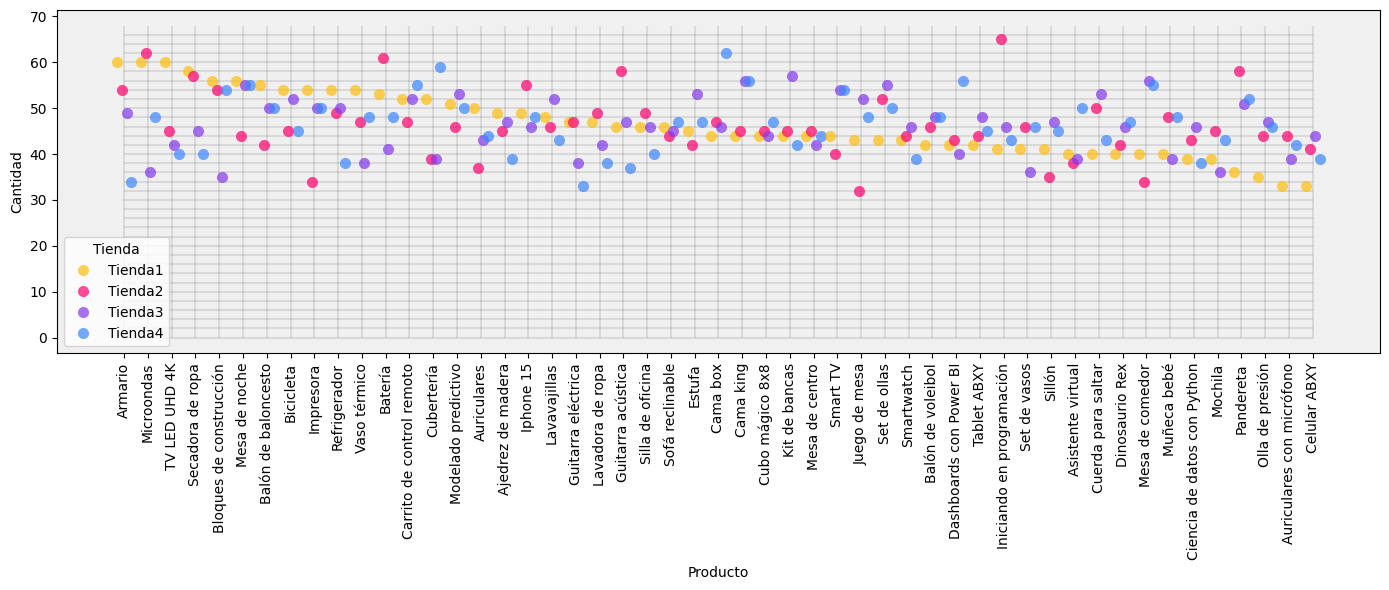

In [16]:
# GRÁFICO 1

# Definiendo el tamaño del gráfico
plt.figure(figsize=(14, 6));
# Crear el gráfico de puntos
ax = sns.swarmplot(df_productos_t_cant, x="Producto", y="Cantidad", hue="Tienda", palette=['#ffbe0b', "#ff006e", '#8338ec', '#3a86ff'], dodge=True, size=8, alpha=0.7);
plt.xticks(rotation=90, fontsize=10);

# Configurar el fondo del gráfico
ax.set_facecolor('#f0f0f0');
# Configurar las líneas verticales en el gráfico
# Añadir líneas verticales en el eje x
ax.vlines(x = [i for i in range(51)], 
          ymin = 0, 
          ymax = 68,
          colors = ["#01010118" for i in range(51)]) 
# Configurar las líneas horizontales en el gráfico
# Añadir líneas horizontales en el eje y
ax.hlines(y = [i for i in range(0,68,2)],
          xmin = 0,
          xmax = 50,
          colors = ["#01010118" for i in range(140)]) 
plt.tight_layout()
# Configurar las etiquetas del eje x
plt.xticks(rotation=90, fontsize=10);


In [17]:
# Creamos el df_prod_cant que almacena los productos más vendidos por tienda, y el menos vendido


for i, tienda in enumerate(df_tiendas['Tienda'].unique()):
    # Agrupamos por tienda y producto, contando la cantidad de productos vendidos, eliminando el índice original
    df_t = df_productos_t_cant[df_productos_t_cant['Tienda'] == tienda].reset_index(drop=True)
    # Seleccionamos los primeros 4 productos más vendidos de la tienda, y el menos vendido, eliminando el índice original
    df_t = df_t.iloc[[0, 1, 2, 3, int(df_t.shape[0])-1]].reset_index(drop=True)
    # Si es la primera iteración, inicializamos df_prod_cant con la información de la primera tienda
    if i == 0:
        df_prod_cant = df_t
    # En las siguientes iteraciones, concatenamos el df obtenido de la tienda actual
    else:
        df_prod_cant = pd.concat([df_prod_cant, df_t], ignore_index=True)
      
df_prod_cant

,Tienda,Producto,Cantidad
0,Tienda1,Armario,60
1,Tienda1,Microondas,60
2,Tienda1,TV LED UHD 4K,60
3,Tienda1,Secadora de ropa,58
4,Tienda1,Celular ABXY,33
5,Tienda2,Iniciando en programación,65
6,Tienda2,Microondas,62
7,Tienda2,Batería,61
8,Tienda2,Guitarra acústica,58
9,Tienda2,Juego de mesa,32


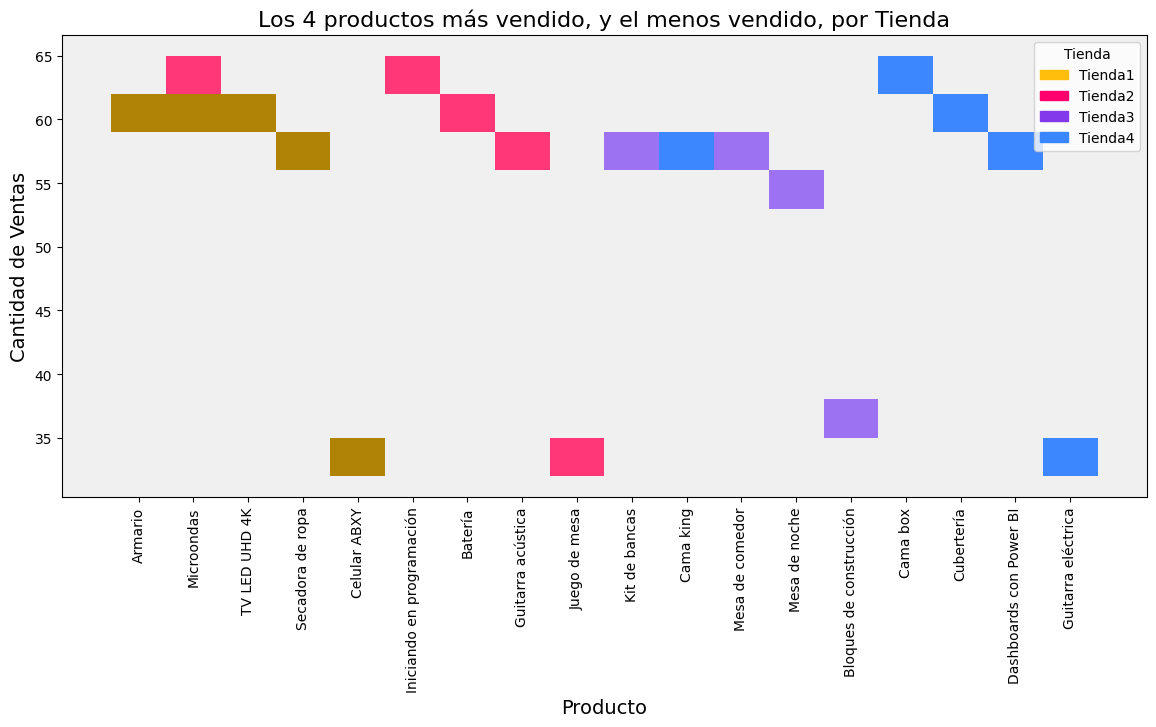

In [18]:
# GRÁFICO 2

# Definir el tamaño del gráfico
plt.figure(figsize=(14, 6));
# Crear el histograma
ax = sns.histplot(df_prod_cant, x=df_prod_cant["Producto"],y = df_prod_cant['Cantidad'], hue="Tienda", element="step", kde=True, kde_kws={'bw_adjust': 0.5}, palette=['#ffbe0b', "#ff006e", '#8338ec', '#3a86ff']);
# Configurar el título y las etiquetas
ax.set_title('Los 4 productos más vendido, y el menos vendido, por Tienda', fontsize=16);
# Configurar las etiquetas de los ejes
ax.set_xlabel('Producto', fontsize=14);
ax.set_ylabel('Cantidad de Ventas', fontsize=14);
# Configurar el fondo del gráfico
ax.set_facecolor('#f0f0f0');

plt.xticks(rotation=90, fontsize=10);


In [19]:
# ampliamos el df con productos más vendidos por tienda para comparar

for i, producto in enumerate(df_prod_cant['Producto'].unique()):
    condicion = df_productos_t_cant['Producto'] == producto
    df_filtrado = df_productos_t_cant[condicion].reset_index(drop=True)
    if i == 0:
        df = df_filtrado.reset_index(drop=True)
    else:
        df = pd.concat([df, df_filtrado], ignore_index=True)

# Ordenamos el DataFrame por tienda y cantidad de productos vendidos, eliminando el índice original
df.sort_values(by=['Tienda', 'Cantidad'], ascending=[True, False], inplace=True)
df.reset_index(drop=True, inplace=True)
df
    

,Tienda,Producto,Cantidad
0,Tienda1,Armario,60
1,Tienda1,Microondas,60
2,Tienda1,TV LED UHD 4K,60
3,Tienda1,Secadora de ropa,58
4,Tienda1,Mesa de noche,56
...,...,...,...
67,Tienda4,Secadora de ropa,40
68,Tienda4,Celular ABXY,39
69,Tienda4,Guitarra acústica,37
70,Tienda4,Armario,34


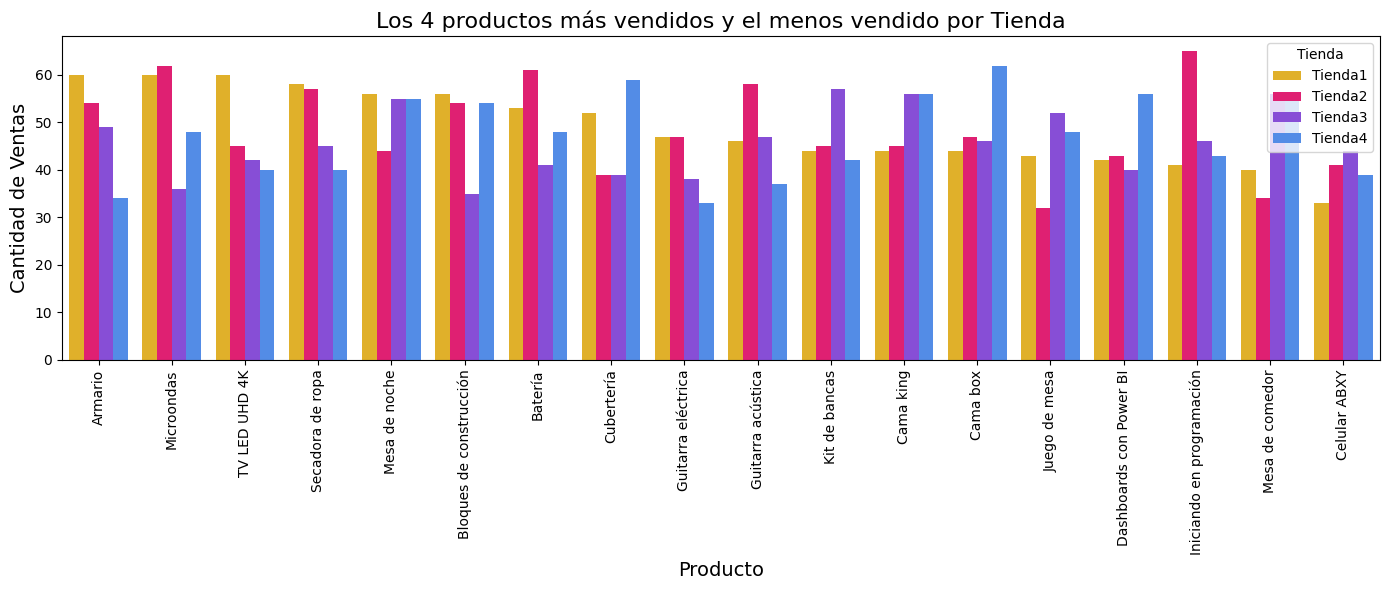

In [20]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x="Producto", y="Cantidad", hue="Tienda", palette=['#ffbe0b', "#ff006e", '#8338ec', '#3a86ff'])
plt.title('Los 4 productos más vendidos y el menos vendido por Tienda', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad de Ventas', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [21]:
# Exportamos el DataFrame a un archivo CSV
df.to_csv('base_de_datos/productos_vendidos.csv', index=False)

# 5. Envío promedio por tienda

En este paso, calculamos el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [34]:
def promedioEnvio (tiendas):
     return tiendas.groupby('Tienda')['Costo de envío'].mean().reset_index(name='Costo de envío promedio').sort_values(by='Costo de envío promedio', ascending=False).reset_index(drop=True)
promedioEnvio(df_tiendas)

,Tienda,Costo de envío promedio
0,Tienda1,26018.609580
1,Tienda2,25216.235693
2,Tienda3,24805.680373
3,Tienda4,23459.457167


# Conclusión

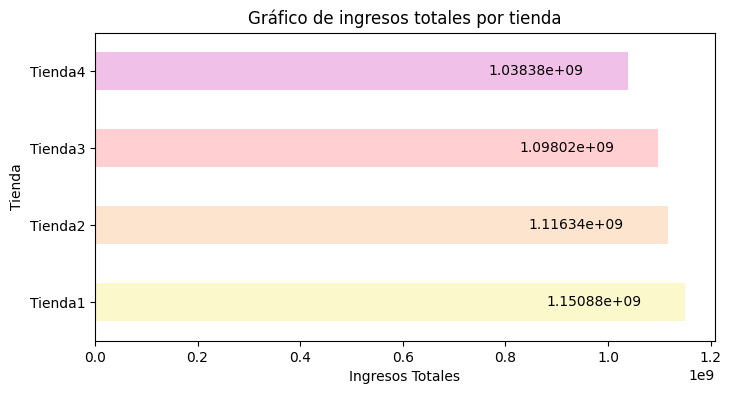

,Tienda,Ingresos Totales
0,Tienda1,1150880400
1,Tienda2,1116343500
2,Tienda3,1098019600
3,Tienda4,1038375700


In [53]:
ingresos_por_tienda(df_tiendas)

**La tienda1 es la de mayor ingresos, y la tienda4 la de menores ingresos**

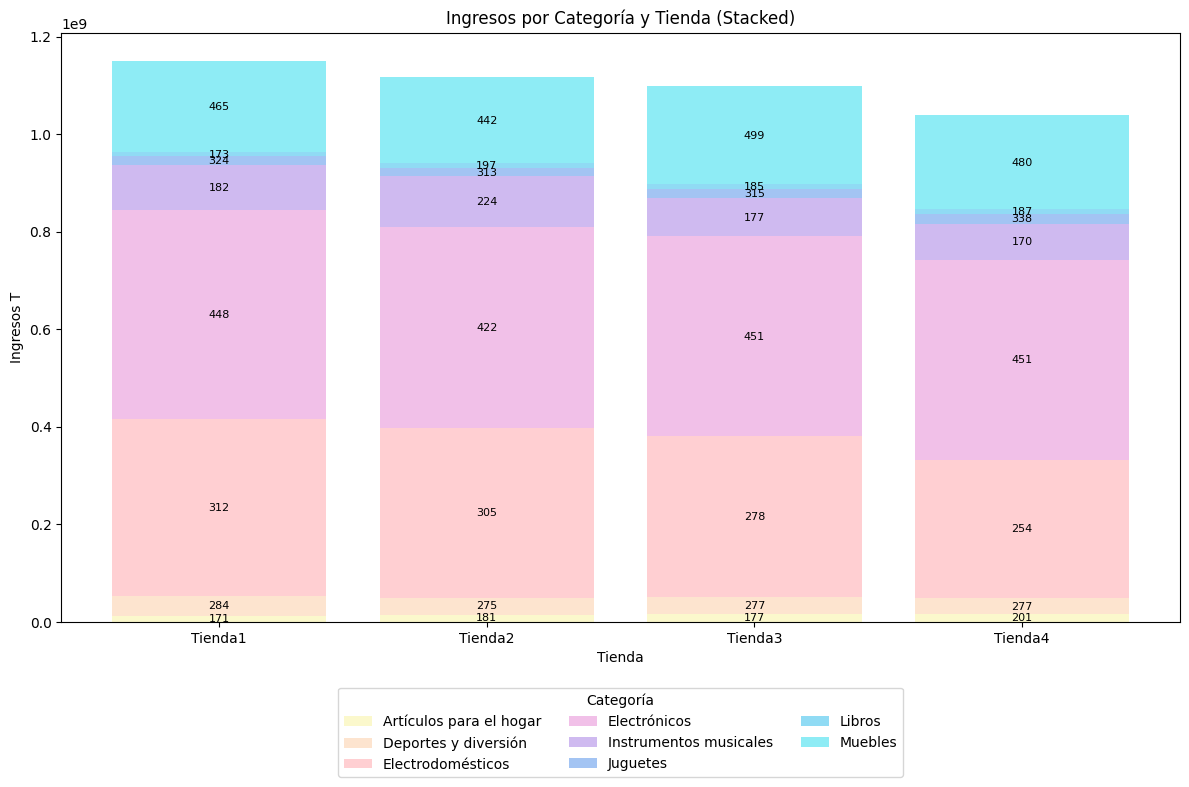

In [54]:
df = ventas_por_categoria(df_tiendas)

**Las ventas por categoría son bastantes similares, pero la tienda 4 es la que tuvo menos ventas**

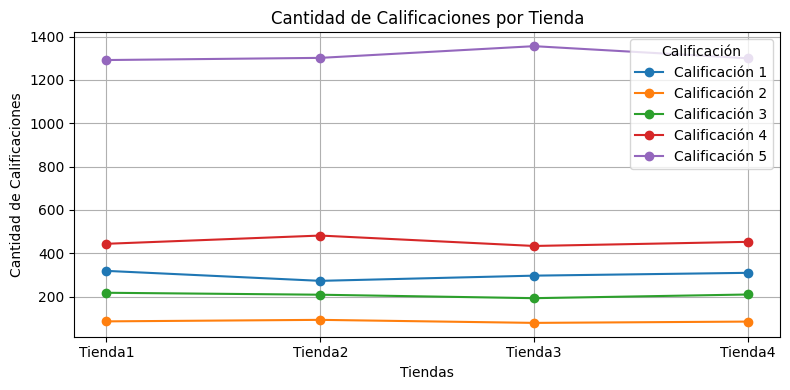

,1,2,3,4,5,Promedio
Tienda,,,,,,
Tienda1,319,86,218,444,1292,3.98
Tienda2,273,93,209,482,1302,4.04
Tienda3,297,79,193,434,1356,4.05
Tienda4,310,85,210,453,1300,4.00


In [55]:
calificacion_promedio(df_tiendas)

**Las calificaciones están equilibradas**

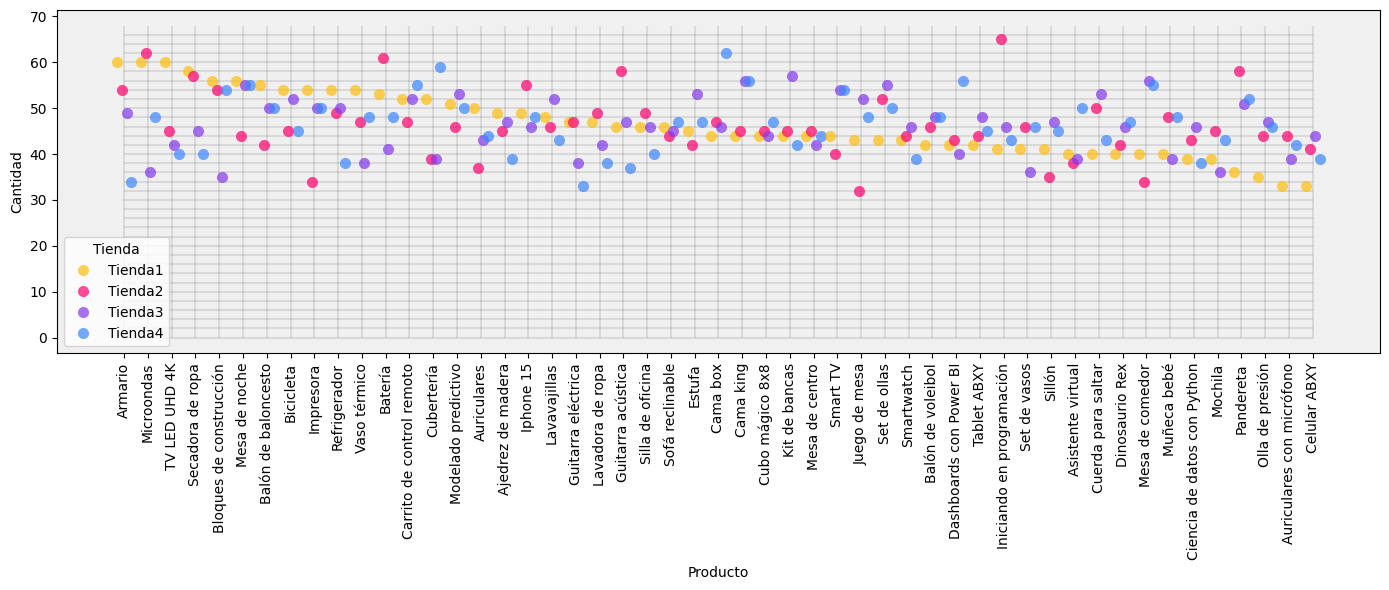

In [56]:
# GRÁFICO 1

# Definiendo el tamaño del gráfico
plt.figure(figsize=(14, 6));
# Crear el gráfico de puntos
ax = sns.swarmplot(df_productos_t_cant, x="Producto", y="Cantidad", hue="Tienda", palette=['#ffbe0b', "#ff006e", '#8338ec', '#3a86ff'], dodge=True, size=8, alpha=0.7);
plt.xticks(rotation=90, fontsize=10);

# Configurar el fondo del gráfico
ax.set_facecolor('#f0f0f0');
# Configurar las líneas verticales en el gráfico
# Añadir líneas verticales en el eje x
ax.vlines(x = [i for i in range(51)], 
          ymin = 0, 
          ymax = 68,
          colors = ["#01010118" for i in range(51)]) 
# Configurar las líneas horizontales en el gráfico
# Añadir líneas horizontales en el eje y
ax.hlines(y = [i for i in range(0,68,2)],
          xmin = 0,
          xmax = 50,
          colors = ["#01010118" for i in range(140)]) 
plt.tight_layout()
# Configurar las etiquetas del eje x
plt.xticks(rotation=90, fontsize=10);


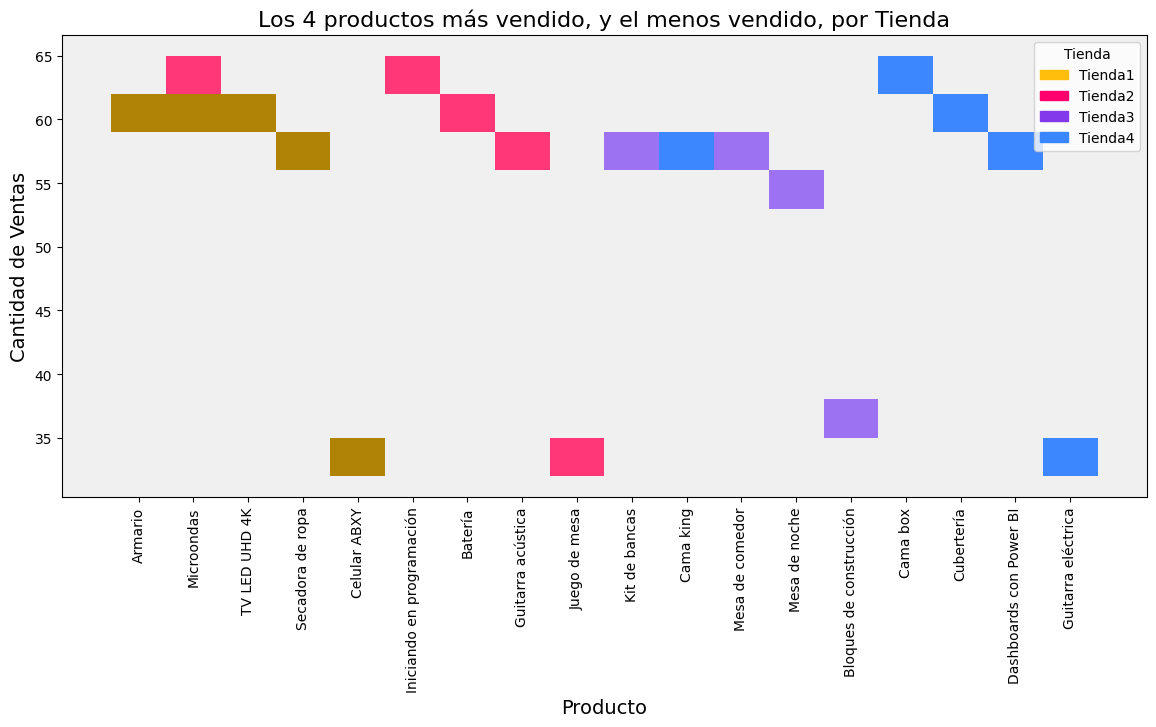

In [57]:
# GRÁFICO 2

# Definir el tamaño del gráfico
plt.figure(figsize=(14, 6));
# Crear el histograma
ax = sns.histplot(df_prod_cant, x=df_prod_cant["Producto"],y = df_prod_cant['Cantidad'], hue="Tienda", element="step", kde=True, kde_kws={'bw_adjust': 0.5}, palette=['#ffbe0b', "#ff006e", '#8338ec', '#3a86ff']);
# Configurar el título y las etiquetas
ax.set_title('Los 4 productos más vendido, y el menos vendido, por Tienda', fontsize=16);
# Configurar las etiquetas de los ejes
ax.set_xlabel('Producto', fontsize=14);
ax.set_ylabel('Cantidad de Ventas', fontsize=14);
# Configurar el fondo del gráfico
ax.set_facecolor('#f0f0f0');

plt.xticks(rotation=90, fontsize=10);

**En base a la venta de productos individuales se ven dispersos, no aportan información relevante**

In [58]:
promedioEnvio(df_tiendas)

,Tienda,Costo de envío promedio
0,Tienda1,26018.609580
1,Tienda2,25216.235693
2,Tienda3,24805.680373
3,Tienda4,23459.457167


En conclusión se debería cerrar la tienda4 porque es la de menores ingresos totales y menos ventas. Aunque sus costos de envío son menores, esto no compensa la baja facturación.


De todas maneras, **esta conclusión resulta inválida**, porque no tuve en cuenta el factor Fecha de Compra y Ubicación de las mismas. 

Ese análisis lo realizaré en la versión 3 de este análisis.